## Introduction
This notebook originated from the Kaggle bot! However, it only looked at the names of the EEG files in the directory.  Rafael has added the rest.

In [1]:
# Colab settings/mount
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My\ Drive/CSE\ 240/Project/Data/EEG

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/CSE 240/Project/Data/EEG


In [2]:
!ls

eeg_small.png  S006E04.edf  S011E02.edf  S015E04.edf  S020E02.edf  S024E04.edf
S002E03.edf    S007E01.edf  S011E03.edf  S016E01.edf  S020E03.edf  S025E01.edf
S002E04.edf    S007E02.edf  S011E04.edf  S016E02.edf  S020E04.edf  S025E02.edf
S003E01.edf    S007E03.edf  S012E01.edf  S016E03.edf  S021E01.edf  S025E03.edf
S003E02.edf    S007E04.edf  S012E02.edf  S016E04.edf  S021E02.edf  S025E04.edf
S003E03.edf    S008E01.edf  S012E03.edf  S017E01.edf  S021E03.edf  S026E01.edf
S003E04.edf    S008E02.edf  S012E04.edf  S017E02.edf  S021E04.edf  S026E02.edf
S004E01.edf    S008E03.edf  S013E01.edf  S017E03.edf  S022E01.edf  S026E03.edf
S004E02.edf    S008E04.edf  S013E02.edf  S017E04.edf  S022E02.edf  S026E04.edf
S004E03.edf    S009E01.edf  S013E03.edf  S018E01.edf  S022E03.edf  S027E01.edf
S004E04.edf    S009E02.edf  S013E04.edf  S018E02.edf  S022E04.edf  S027E02.edf
S005E01.edf    S009E03.edf  S014E01.edf  S018E03.edf  S023E01.edf  S027E03.edf
S005E02.edf    S009E04.edf  S014E02.edf  S018E04.edf

In [3]:
!pip install mne

     |████████████████████████████████| 6.4MB 3.2MB/s 


In [0]:
import mne    # for reading .edf files (and much else)

In [5]:
file = "S001E01.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from /content/gdrive/My Drive/CSE 240/Project/Data/EEG/S001E01.edf...
EDF file detected


FileNotFoundError: ignored

In [0]:
info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | AF3, F7, F3, FC5, T7, P7, O1, O2, P8, ...
    chs : list | 14 items (EEG: 14)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 128.0 Hz
    meas_date : tuple | 2018-06-13 14:34:37 GMT
    nchan : int | 14
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 256.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
 

In [0]:
channels

['AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4']

In [0]:
raw_data.shape

(14, 46080)

## Exploratory Analysis
The following packages are often useful.

In [0]:
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
#import os # accessing directory structure
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#from scipy.io import loadmat   # this function imports .MAT files (MatLab files) into Python (as directories)

### EEG Data

The actual surface electrode readings are given in the dat6 array. For example, at time 1000 we have the following microvolt measurments at each of the 25 leads.

In [0]:
raw_data[:, 1000]

array([4.27519883e-05, 4.65109476e-05, 2.76258476e-05, 5.37701260e-05,
       1.93465649e-05, 1.24181482e-05, 1.06720265e-05, 1.67187913e-05,
       8.44941075e-05, 2.36010758e-05, 4.19182986e-05, 2.76447411e-05,
       2.96294392e-05, 1.54665940e-04])

Lets take a look at lead 10.

In [0]:
channel = 1   # occipital lead  O1 
raw_data[channel, : 50]

array([ 8.65048524e-07,  2.36749975e-06,  2.36749975e-06,  8.65048524e-07,
       -1.71058215e-06, -2.71221630e-06, -2.21139922e-06, -7.08947997e-07,
       -2.08130922e-07, -7.08947997e-07, -1.71058215e-06, -2.21139922e-06,
       -2.21139922e-06, -1.71058215e-06, -2.71221630e-06, -2.71221630e-06,
       -1.20976507e-06,  2.36749975e-06,  4.44231334e-06,  1.86668267e-06,
       -5.28784697e-06, -1.25139219e-05, -1.55903696e-05, -1.14407425e-05,
       -3.28457867e-06,  5.44394749e-06,  1.10960259e-05,  1.20976601e-05,
        1.00943918e-05,  7.01794401e-06,  3.94149627e-06,  2.36749975e-06,
        1.86668267e-06,  2.36749975e-06,  3.94149627e-06,  5.44394749e-06,
        5.94476457e-06,  4.44231334e-06, -2.08130922e-07, -6.36102641e-06,
       -1.04391083e-05, -9.93829123e-06, -5.78866404e-06,  8.65048524e-07,
        5.44394749e-06,  5.94476457e-06,  3.44067919e-06, -2.08130922e-07,
       -3.28457867e-06, -5.28784697e-06])

In [0]:
channels[channel]

'F7'

In [0]:
raw_data[channel,:]

array([8.65048524e-07, 2.36749975e-06, 2.36749975e-06, ...,
       9.41601150e-05, 9.31584809e-05, 8.95812161e-05])

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

x = np.linspace(0, len(raw_data[channel, :]) / 256., len(raw_data[channel, :]))
y = raw_data[channel, :]

plt.plot(x, y)
plt.title('Lead #' + channels[channel]) 
plt.xlabel('Seconds'); plt.ylabel('microvolts')
plt.show()

NameError: ignored

Let's create a spectrogram for this lead.

In [8]:
from scipy import signal
plt.set_cmap('jet')
x = raw_data[channel, 1280:2560]
print(x)
#x = raw_data[channel, 1280:2561]
#fs = 256  # Assume 512 Hz sampling rate for now...   # SampFreq[0, 0] 
#f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(512, .25))
fs = 256  # Assume 512 Hz sampling rate for now...   # SampFreq[0, 0] 
f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(256), noverlap = 204)

plt.pcolormesh(t, f, np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Lead ' + str(channel)) # + LsEEG[channel]

#plt.show()
fig, ax = plt.subplots( nrows=1, ncols=1 )
fig.figsize= (800, 800)
ax.pcolormesh(t, f, np.log10(Sxx))
fig.savefig('eeg_small.png')   # save the figure to file
plt.close(fig)


NameError: ignored

<Figure size 432x288 with 0 Axes>

In [0]:
print(len(t))

20


## Run this to generate images

Extracting EDF parameters from /content/gdrive/My Drive/CSE 240/Project/Data/EEG/S002E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Processing AF3 channel of file S002E03.edf part 0.
Processing F7 channel of file S002E03.edf part 0.
Processing F3 channel of file S002E03.edf part 0.
Processing FC5 channel of file S002E03.edf part 0.
Processing T7 channel of file S002E03.edf part 0.
Processing P7 channel of file S002E03.edf part 0.
Processing O1 channel of file S002E03.edf part 0.
Processing O2 channel of file S002E03.edf part 0.
Processing P8 channel of file S002E03.edf part 0.
Processing T8 channel of file S002E03.edf part 0.
Processing FC6 channel of file S002E03.edf part 0.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log10


Processing F4 channel of file S002E03.edf part 0.
Processing F8 channel of file S002E03.edf part 0.
Processing AF4 channel of file S002E03.edf part 0.
Processing AF3 channel of file S002E03.edf part 1.
Processing F7 channel of file S002E03.edf part 1.
Processing F3 channel of file S002E03.edf part 1.
Processing FC5 channel of file S002E03.edf part 1.
Processing T7 channel of file S002E03.edf part 1.
Processing P7 channel of file S002E03.edf part 1.
Processing O1 channel of file S002E03.edf part 1.
Processing O2 channel of file S002E03.edf part 1.
Processing P8 channel of file S002E03.edf part 1.
Processing T8 channel of file S002E03.edf part 1.
Processing FC6 channel of file S002E03.edf part 1.
Processing F4 channel of file S002E03.edf part 1.
Processing F8 channel of file S002E03.edf part 1.
Processing AF4 channel of file S002E03.edf part 1.
Processing AF3 channel of file S002E03.edf part 2.
Processing F7 channel of file S002E03.edf part 2.
Processing F3 channel of file S002E03.edf pa

<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


Processing F4 channel of file S002E04.edf part 32.
Processing F8 channel of file S002E04.edf part 32.
Processing AF4 channel of file S002E04.edf part 32.
Processing AF3 channel of file S002E04.edf part 33.
Processing F7 channel of file S002E04.edf part 33.
Processing F3 channel of file S002E04.edf part 33.
Processing FC5 channel of file S002E04.edf part 33.
Processing T7 channel of file S002E04.edf part 33.
Processing P7 channel of file S002E04.edf part 33.
Processing O1 channel of file S002E04.edf part 33.
Processing O2 channel of file S002E04.edf part 33.
Processing P8 channel of file S002E04.edf part 33.
Processing T8 channel of file S002E04.edf part 33.
Processing FC6 channel of file S002E04.edf part 33.
Processing F4 channel of file S002E04.edf part 33.
Processing F8 channel of file S002E04.edf part 33.
Processing AF4 channel of file S002E04.edf part 33.
Processing AF3 channel of file S002E04.edf part 34.
Processing F7 channel of file S002E04.edf part 34.
Processing F3 channel of 

KeyboardInterrupt: ignored

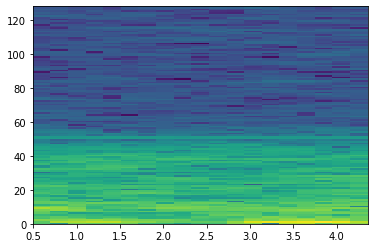

In [2]:
import matplotlib.pyplot as plt # plotting
import mne
import numpy as np # linear algebra
import os
from scipy import signal
from sklearn.preprocessing import StandardScaler

# If folders don't exist already create them in the home directory.
if not os.path.exists("raw_images"):
    os.mkdir("raw_images")
if not os.path.exists("raw_images/relaxed"):
    os.mkdir("raw_images/relaxed")
if not os.path.exists("raw_images/concentration"):
    os.mkdir("raw_images/concentration")
if not os.path.exists("../spectrogram_images"):
    os.mkdir("../spectrogram_images")
if not os.path.exists("../spectrogram_images/relaxed"):
    os.mkdir("../spectrogram_images/relaxed")
if not os.path.exists("../spectrogram_images/concentration"):
    os.mkdir("../spectrogram_images/concentration")

for filename in os.listdir('.'):
    file_name = os.path.join('.',filename)
  
    file_type = 0 if filename.split(".")[0].endswith("E01") or filename.split(".")[0].endswith("E03") else 1
    data = mne.io.read_raw_edf(file_name)
    raw_data = data.get_data()
    info = data.info
    channels = data.ch_names
    for part in range(36):
        for index, channel in enumerate(channels):
            print("Processing %s channel of file %s part %s." % (channel, filename, part))
            folder_name = filename.split(".")[0] + "_" + str(part)
            '''
            folder_path = os.path.join('raw_images/relaxed',folder_name) if file_type == 0 else os.path.join('raw_images/concentration',folder_name)
            if not os.path.exists(folder_path):
                print("creating folder %s." % (folder_name))
                os.mkdir(folder_path)
            new_filename = "%s_%s.png" % (folder_name, channel)
            # path to store raw time domain images of the signals
            # choose folder based on file type
            start = part * 1280
            end = (part+1) * 1280
            new_file_path = os.path.join(folder_path, new_filename)
            x = np.linspace(0, len(raw_data[index, start:end]) / 256., len(raw_data[index, start:end]))
            y = raw_data[index, start:end]
            fig, ax = plt.subplots( nrows=1, ncols=1 )
            fig.figsize= (800, 800)
            ax.plot(x, y)
            #ax.title('Lead #' + channel) 
            #ax.xlabel('Seconds'); plt.ylabel('microvolts')
            fig.savefig(new_file_path)   # save the figure to file
            plt.close(fig)
            #plt.plot(x, y)
            #plt.show()
            '''
            start = part * 1280
            end = (part+1) * 1280
            # path to store frequency domain spectrogram images of the signals
            folder_path = os.path.join('../spectrogram_images/relaxed',folder_name) if file_type == 0 else os.path.join('../spectrogram_images/concentration',folder_name)
            if not os.path.exists(folder_path):
                print("creating folder %s." % (folder_name))
                os.mkdir(folder_path)
            new_filename = "%s_%s.png" % (folder_name, channel)
            new_file_path = os.path.join(folder_path, new_filename)
            x = raw_data[index, start:end]
            fs = 256  # Assume 512 Hz sampling rate for now...   # SampFreq[0, 0] 
            #f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(512, .25))
            f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(256), noverlap = 204)
            fig, ax = plt.subplots( nrows=1, ncols=1 )
            fig.figsize= (800, 800)
            ax.pcolormesh(t, f, np.log10(Sxx))
            #ax.ylabel('Frequency [Hz]')
            #ax.xlabel('Time [sec]')
            #plt.title('Lead ' + channel) # + LsEEG[channel]
            #ax.set_cmap('jet')
            #plt.show()
            fig.savefig(new_file_path)   # save the figure to file
            plt.close(fig)
    
    '''
    f = pyedflib.EdfReader(file_name)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
    new_filename = filename.replace(".edf",".csv")
    new_file_path = os.path.join('spectrogram_files',new_filename)
    os.mkdir(new_file_path)
    with open(new_file_path, mode='w') as record_file:
        record_writer = csv.writer(record_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        for record in sigbufs:
            record_writer.writerow(record)
    '''